# Data Analysis Project 9: Survey Dataset

- https://youtu.be/uaLHWSgyrnQ?list=PLy3lFw0OTlutzXFVwttrtaRGEEyLEdnpy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Data Description:** \
A sample survey data (`sample_survey.csv`
) is provided for analysis. Samples were collected over a period of nine days where the respondents were asked questions related to elections. Survey weights are in the "weight" column. Applicants are requested to use *python-pandas* for all data manipulations and *matplotlib* for any plotting related questions. Applicants are expected to not use *for-loops* or any kind of *iterations* for solving the questions. Use in built *pandas* functions only.

## Q1) Load the dataset into a pandas dataframe. Name the variable as “survey”.

In [2]:
survey = pd.read_csv("data/sample_survey.csv")
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


## Q2) How many samples were collected on each day?

In [3]:
survey['collection_date'] = pd.to_datetime(survey['collection_date'])
survey['collection_date'].value_counts()

collection_date
2017-05-24    1479
2017-05-25     998
2017-05-28     761
2017-05-27     665
2017-05-29     620
2017-06-01     607
2017-05-26     598
2017-05-30     582
2017-05-31     557
Name: count, dtype: int64

## Q3) What proportion of the total respondents were aged less than 45?

In [4]:
survey['age'].unique()

array(['26', '34', '25', '36', '22', '38', '23', '42', '51', '29', '24',
       '30', '39', '37', '19', '44', '53', '32', '21', '18', '20', '27',
       '48', '28', '45', '74', '35', '31', '70', '40', '49', '46', '43',
       '41', '33', '58', '24ko', '56', '50', '55', '54', '62', '60', '59',
       '47', '61', '52', '66', '57', '67', '65', '71', '63', '64', '68',
       '69', '99', '72', '75', '76'], dtype=object)

In [5]:
survey['age'][survey['age']=='24ko'] = 24

# survey['age'].replace({'24ko':24}, inplace=True)

C:\Users\JAVOHIR\AppData\Local\Temp\ipykernel_8568\2520927259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['age'][survey['age']=='24ko'] = 24


In [6]:
survey['age'] = survey['age'].astype(int)

In [7]:
print(f"{survey[survey['age'] < 45].shape[0] / survey.shape[0] * 100:.2f}%")

93.18%


## Q4) Create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. The dataframe should look like this after the column creation:

|response_id|age|age_group|
|:-|:-|:-|
|1|26|25-40|
|2|34|25-40|
|3|25|25-40|
|4|66|55+|

In [8]:
print(survey['age'].min())
print(survey['age'].max())

18
99


In [9]:
survey['age_group'] = pd.cut(x=survey['age'],
                             bins=[18, 25, 40, 55, 100],
                             right=False,
                             labels=['18-25', '25-40', '40-55', '55+']
                            )
survey.sample(5)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
361,362,2017-05-25,Urban,Graduate,"₹ 20,000 - ₹ 30,000",BJP,BJP,Can’t say,Can’t say,30,Male,186,BC,0.192187,25-40
1696,1697,2017-05-26,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RJD,RJD,Somewhat Dissatisfied,Fully Dissatisfied,39,Male,71,SC,3.058429,25-40
2272,2273,2017-05-31,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RJD,Did not vote,Fully Dissatisfied,Fully Dissatisfied,23,Male,139,BC,0.162454,18-25
6040,6041,2017-06-01,Rural,Graduate,"₹ 30,000 - ₹ 50,000",BJP,BJP,Somewhat Satisfied,Somewhat Satisfied,24,Male,46,Gen,0.038824,18-25
1936,1937,2017-05-28,Urban,Post - Graduation,"₹ 1,50,000 & above",RJD,Others,Fully Dissatisfied,Fully Dissatisfied,24,Male,73,Gen,0.296404,18-25


## Q5) How many samples were collected for each age-group? Which age-group had the most samples?

In [11]:
survey['age_group'].value_counts()

age_group
25-40    3844
18-25    2094
40-55     801
55+       128
Name: count, dtype: int64

## Q6) What proportion of the respondents had opted for the **RJD** party in both the Vote_Now and the Past_Vote questions?

In [12]:
mask = (survey['Vote_Now']=='RJD') & (survey['Past_Vote']=='RJD')
print(f"{survey[mask].shape[0] / survey.shape[0] * 100:.2f}%")

11.81%


## Q7) For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.

In [20]:
all_date = survey['collection_date'].value_counts()
fully_satisfied = survey[survey['CM_satisfaction']=='Fully Satisfied']['collection_date'].value_counts()

fully_satisfied / all_date * 100

collection_date
2017-05-24     9.871535
2017-05-25     9.519038
2017-05-26     9.866221
2017-05-27     8.120301
2017-05-28    12.089356
2017-05-29    11.774194
2017-05-30    11.168385
2017-05-31    11.131059
2017-06-01    12.355848
Freq: D, Name: count, dtype: float64

## Q8) In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

collection_date
2017-05-24    59.972955
2017-05-25    63.126253
2017-05-26    59.030100
2017-05-27    60.601504
2017-05-28    60.709593
2017-05-29    56.451613
2017-05-30    62.027491
2017-05-31    57.630162
2017-06-01    63.426689
Freq: D, Name: count, dtype: float64


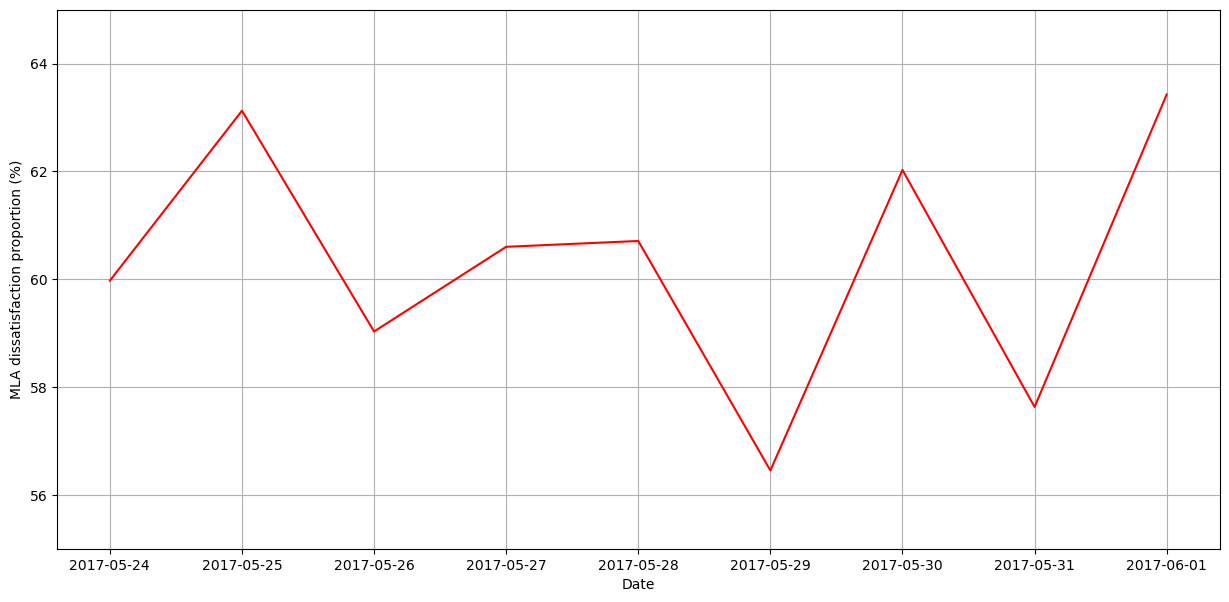

In [34]:
all_date = survey['collection_date'].value_counts()
fully_dissatisfied = survey[survey['MLA_satisfaction']=='Fully Dissatisfied']['collection_date'].value_counts()
mla_dissatisfaction = (fully_dissatisfied / all_date * 100)
print(mla_dissatisfaction)

plt.figure(figsize=[15, 7])
plt.plot(mla_dissatisfaction.index, mla_dissatisfaction.values, c='red')
plt.grid()
plt.ylim(55, 65)
plt.xlabel("Date")
plt.ylabel("MLA dissatisfaction proportion (%)")
plt.show()

## Q9) Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.

In [39]:
pd.pivot_table(
    survey,
    index='Past_Vote',
    columns='Vote_Now',
    values='response_id',
    aggfunc='count',
    fill_value=0
)

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7,1,1630,3,5,42,101,110,44,13,194,32,87,370,88,24,62,10
BSP,0,1,2,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Did not vote,8,5,231,2,1,22,41,69,10,16,83,11,51,195,20,3,31,5
HAM,2,0,25,0,1,0,3,2,2,0,4,0,0,6,4,0,1,0
INC,0,6,6,0,0,57,10,9,0,3,6,3,3,100,1,2,7,0
JAP(L),0,0,4,0,0,0,35,0,0,0,0,1,0,2,0,0,0,0
JD(U),6,10,254,2,2,45,72,279,29,9,90,18,43,435,13,25,36,6
LJP,0,0,76,1,0,4,3,6,9,2,3,0,2,17,1,0,1,0
Left Front,0,1,2,0,0,1,0,0,0,18,1,1,0,4,0,1,0,1


## Q10) Repeat the above question with the cell values as the sum of “weight”.

In [16]:
pd.pivot_table(
    survey,
    index='Past_Vote',
    columns='Vote_Now',
    values='weight',
    aggfunc='sum',
    fill_value=0
)

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,0.000000,1.654731,5.174487,32.010277,0.000000,2.298223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,0.000000,25.348884,0.000000,1.648856,0.000000,0.712161,1.006719,2.496424,0.000000,0.928984,0.000000,0.000000,7.713008,1.903148,0.000000,0.039564,0.000000
INC,0.000000,11.105958,1.642875,0.000000,0.000000,161.742302,18.942597,11.077323,0.000000,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,0.000000
JAP(L),0.000000,0.000000,6.512846,0.000000,0.000000,0.000000,57.876224,0.000000,0.000000,0.000000,0.000000,3.195682,0.000000,2.164824,0.000000,0.000000,0.000000,0.000000
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806262,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,0.000000,0.000000,85.010450,2.481377,0.000000,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,0.000000,1.927965,30.737989,0.478933,0.000000,1.709409,0.000000
Left Front,0.000000,2.298223,0.209586,0.000000,0.000000,2.291368,0.000000,0.000000,0.000000,44.280864,0.201455,8.309203,0.000000,6.740281,0.000000,0.877960,0.000000,3.020887


## Q11) Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.

In [46]:
df1 = survey.groupby('age_group').count()
df1

C:\Users\JAVOHIR\AppData\Local\Temp\ipykernel_8568\505089628.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = survey.groupby('age_group').count()


,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
age_group,,,,,,,,,,,,,,
18-25,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094
25-40,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844
40-55,801,801,801,801,801,801,801,801,801,801,801,801,801,801
55+,128,128,128,128,128,128,128,128,128,128,128,128,128,128


## Q12) Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [47]:
df2 = survey[survey['Vote_Now']=='JD(U)'].groupby('age_group').count()
df2

C:\Users\JAVOHIR\AppData\Local\Temp\ipykernel_8568\342512847.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = survey[survey['Vote_Now']=='JD(U)'].groupby('age_group').count()


,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
age_group,,,,,,,,,,,,,,
18-25,181,181,181,181,181,181,181,181,181,181,181,181,181,181
25-40,264,264,264,264,264,264,264,264,264,264,264,264,264,264
40-55,68,68,68,68,68,68,68,68,68,68,68,68,68,68
55+,13,13,13,13,13,13,13,13,13,13,13,13,13,13


## Q13) Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group.

In [48]:
pd.merge(df1, df2, right_index=True, left_index=True)

,response_id_x,collection_date_x,urban_rural_x,education_x,income_x,Vote_Now_x,Past_Vote_x,CM_satisfaction_x,MLA_satisfaction_x,age_x,...,income_y,Vote_Now_y,Past_Vote_y,CM_satisfaction_y,MLA_satisfaction_y,age_y,gender_y,assembly_no_y,category_y,weight_y
age_group,,,,,,,,,,,,,,,,,,,,,
18-25,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,...,181,181,181,181,181,181,181,181,181,181
25-40,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,...,264,264,264,264,264,264,264,264,264,264
40-55,801,801,801,801,801,801,801,801,801,801,...,68,68,68,68,68,68,68,68,68,68
55+,128,128,128,128,128,128,128,128,128,128,...,13,13,13,13,13,13,13,13,13,13
